In [82]:
import pandas as pd
import glob
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
warnings.filterwarnings("ignore", category=FutureWarning)


files = glob.glob('./server_results/grid_search/*.csv')

In [83]:
def handle_matcher_names(df):



    # substitutions = {
    #     'header_values_default': 'H+V def.',
    #     'header_values_simple': 'H+V simp.',
    #     'header_values_verbose': 'H+V ver.',
    #     'header_values_repeat': 'H+V rep.',
    #     'header_values_prefix': 'H+V pref.',
    #     'header_only': 'V only',
    #     'header_values_verbose_notype': 'H+V ver. notyp',
    #     'header_values_columnvaluepair_notype': 'H+V col-val notyp',
    #     'header_header_values_repeat_notype': 'H+V rep. notyp',
    #     'header_values_default_notype': 'H+V def. notyp',
    # }

    substitutions = {
        'header_values_default': 'Default (Type)',
        'header_values_verbose': 'Verbose (Type)',
        'header_values_repeat': 'Repeat (Type)',
        'header_values_prefix': 'Prefix (Type)',
        'header_only': 'Header only',
        'header_values_verbose_notype': 'Verbose',
        'header_values_columnvaluepair_notype': 'Header-Value repeat',
        'header_header_values_repeat_notype': 'Repeat',
        'header_values_default_notype': 'Default',
    }

    df['encoding_mode'] = df['encoding_mode'].replace(substitutions)

    # print(df['encoding_mode'].unique())

    to_show = [
        #'Default (Type)',
        'Default',
        'Verbose',
        'Repeat',
        'Header-Value repeat',
        'Header only',
    ]

#     ['Default (Type)' 'Prefix (Type)' 'Repeat (Type)' 'Verbose (Type)'
#  'Column only' 'Verbose' 'ColVal Pairs' 'Repeat' 'Default']

    df = df[df['encoding_mode'].isin(to_show)].copy()


    
    
    df['sampling_mode'] = df['sampling_mode'].str.title()
    df['sampling_mode'] = df['sampling_mode'].str.replace('_Sampling', '')
    df = df[df['sampling_mode'] != 'Mixed'].copy()

    sampling_size = 10
    df = df[df['sampling_size'] == sampling_size].copy()

    df.rename(columns={'All_RecallAtSizeofGroundTruth': 'Recall@GT'}, inplace=True)
    df.rename(columns={'mrr': 'MRR'}, inplace=True)

    return df


def best_aggregate(df, metric='mrr'):

    df_grouped = df.groupby(['encoding_mode', 'sampling_mode', 'sampling_size'])[
        metric].agg(['mean', 'median', 'min', 'max', 'std']).reset_index()
    # df_grouped = df.groupby([ 'sampling_mode','encoding_mode', 'sampling_size'])[metric].agg(['mean', 'median', 'min', 'max', 'std']).reset_index()
    df_grouped = df_grouped.sort_values(by='mean', ascending=False)
    print(df_grouped.head(20).to_string())
    return df_grouped



def plot(df, ax, x, hue, group, y, datasetname, figsize=(15, 5), legend=False, save=None):
    

    order = df.groupby(x)[y].mean().sort_values(ascending=False).index

    hue_order = df.groupby(hue)[y].mean().sort_values(ascending=False).index

    sns.barplot(
        data=df,
        x=x,
        hue=hue,
        y=y,
        ax=ax,
        palette=sns.color_palette("pastel"),  # Use a better palette
        order=order,
        hue_order=hue_order,
        # ci=None  # Disable confidence intervals
    )

    # sns.boxplot(
    #     data=df,
    #     x=x,
    #     hue=hue,
    #     y=y,
    #     ax=ax,
    #     palette=sns.color_palette("Set2"),  # Use a better palette
    #     order=order,
    #     hue_order=hue_order
    #     # , showfliers=False
    #     ,fliersize=0.5

    # )

    #ax.set_xlabel(x.replace('_', ' ').title(), fontsize=14)
    ax.set_xlabel('Column representation', fontsize=14)

    # ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
    ax.set_ylabel(y.upper(), fontsize=14)

    ax.tick_params(axis='x', labelsize=14)
    ax.tick_params(axis='y', labelsize=14)

    if legend:
        ax.set_xlabel('')

    if legend:
        ax.legend(
            title=hue.replace('_mode', '').title(),
            fontsize=14,
            title_fontsize=14,
            loc='lower center',
            bbox_to_anchor=(0.48, 0.98),
            ncol=len(df[hue].unique()),
            frameon=False
        )
    else:
        ax.get_legend().remove()

    sns.despine()



def plot_grouped_bar(df, x, hue, group, metrics, datasetname, figsize=(9, 8), save=None):

    fig, axis = plt.subplots(len(metrics),1 , figsize=figsize, sharex=True)

    for i, metric in enumerate(metrics):
        ax = axis[i]
        plot(df, ax, x, hue, group, metric, datasetname, figsize=figsize, legend=(i==0), save=None)


    if save is not None:
        fig.savefig(save, format='pdf', dpi=300)

    plt.tight_layout()
    plt.show()
   

In [84]:
all_dfs_list = []
datasetnames = []
for file in files:
    datasetname = file.split('_')[0]
    datasetname = file.split('/')[-1].split('_')[0]
    datasetnames.append(datasetname)
    df = pd.read_csv(file)
    df = handle_matcher_names(df)
    
    all_dfs_list.append(df)

    if datasetname == 'GDC':
        gdc_df = df

all_dfs = pd.concat(all_dfs_list)



In [85]:
metric1 = 'MRR'
metric2 = 'Recall@GT'
metrics = [metric1, metric2]

Results for GDC


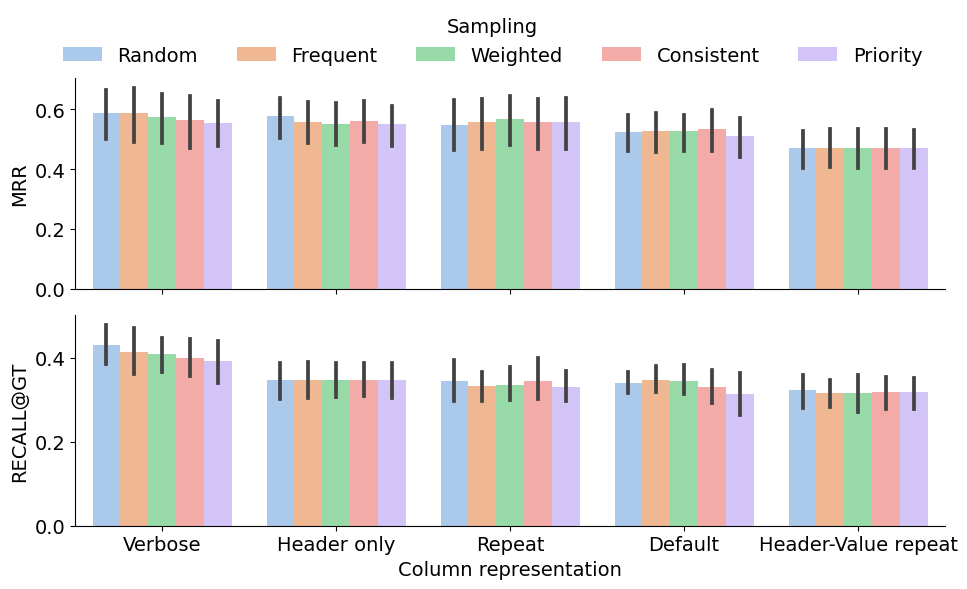

          encoding_mode sampling_mode  sampling_size      mean    median       min       max       std
21              Verbose      Frequent             10  0.587009  0.614096  0.257143  0.750000  0.158082
23              Verbose        Random             10  0.586597  0.622999  0.292857  0.740625  0.143770
18               Repeat        Random             10  0.577652  0.601009  0.323696  0.701102  0.120512
24              Verbose      Weighted             10  0.575697  0.605745  0.297619  0.739183  0.138090
14  Header-Value repeat      Weighted             10  0.566803  0.564932  0.285714  0.738839  0.138208
20              Verbose    Consistent             10  0.565078  0.615697  0.261905  0.739583  0.149354
15               Repeat    Consistent             10  0.560167  0.573823  0.322689  0.700758  0.118960
11  Header-Value repeat      Frequent             10  0.558216  0.585818  0.261905  0.754808  0.154555
16               Repeat      Frequent             10  0.557490  0.564984 

In [86]:
for i,df in enumerate(all_dfs_list):
    datasetname =datasetnames[i]
    if datasetname != 'GDC':
        continue
    print('Results for', datasetname)
    plot_grouped_bar(df,  'encoding_mode', 'sampling_mode','sampling_size', metrics,datasetname, figsize=(10, 6), save = "figures/grid_search_retriever_encmodes.pdf")
    best_aggregate(df, metric1)

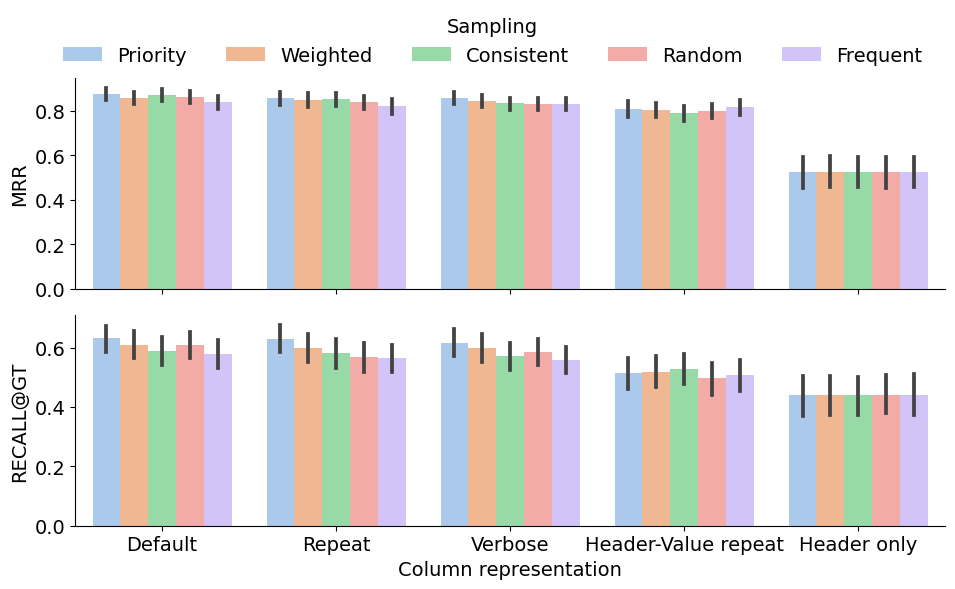

          encoding_mode sampling_mode  sampling_size      mean    median       min  max       std
17               Repeat      Priority             10  0.874764  0.925463  0.330952  1.0  0.149345
15               Repeat    Consistent             10  0.869736  0.916667  0.322689  1.0  0.149556
18               Repeat        Random             10  0.861014  0.916667  0.323696  1.0  0.153428
22              Verbose      Priority             10  0.859224  0.891732  0.270408  1.0  0.153698
19               Repeat      Weighted             10  0.857323  0.910317  0.316545  1.0  0.157444
2               Default      Priority             10  0.856224  0.914389  0.250000  1.0  0.168981
0               Default    Consistent             10  0.851548  0.891194  0.200000  1.0  0.166075
4               Default      Weighted             10  0.848408  0.896970  0.250000  1.0  0.167502
24              Verbose      Weighted             10  0.843927  0.860714  0.297619  1.0  0.153975
16               Rep

,encoding_mode,sampling_mode,sampling_size,mean,median,min,max,std
17,Repeat,Priority,10,0.874764,0.925463,0.330952,1.0,0.149345
15,Repeat,Consistent,10,0.869736,0.916667,0.322689,1.0,0.149556
18,Repeat,Random,10,0.861014,0.916667,0.323696,1.0,0.153428
22,Verbose,Priority,10,0.859224,0.891732,0.270408,1.0,0.153698
19,Repeat,Weighted,10,0.857323,0.910317,0.316545,1.0,0.157444
2,Default,Priority,10,0.856224,0.914389,0.250000,1.0,0.168981
0,Default,Consistent,10,0.851548,0.891194,0.200000,1.0,0.166075
4,Default,Weighted,10,0.848408,0.896970,0.250000,1.0,0.167502
24,Verbose,Weighted,10,0.843927,0.860714,0.297619,1.0,0.153975
16,Repeat,Frequent,10,0.839560,0.888889,0.318094,1.0,0.166825


In [87]:


plot_grouped_bar(all_dfs,  'encoding_mode', 'sampling_mode','sampling_size', metrics, 'Real-world datasets', figsize=(10, 6), save = "figures/grid_search_retriever_encmodes.pdf")
best_aggregate(all_dfs, metric1)



In [88]:
real_datasets = ['gdc_studies', 'Musicians', 'Magellan']
fabricated_datasets = ['ChEMBL', 'OpenData', 'TPC-DI']

df_real = all_dfs[all_dfs['dataset'].isin(real_datasets)]
df_fabricated = all_dfs[all_dfs['dataset'].isin(fabricated_datasets)]

In [89]:
# plot_grouped_bar(df_real,  'encoding_mode', 'sampling_mode','sampling_size', metrics, 'Real-world datasets', figsize=(10, 6), save = "figures/grid_search_retriever_encmodes.pdf")
# best_aggregate(df_real, metric1)

In [90]:
# plot_grouped_bar(df_fabricated,  'encoding_mode', 'sampling_mode','sampling_size', metrics, 'Real-world datasets', figsize=(10, 6), save = "figures/grid_search_retriever_encmodes.pdf")
# best_aggregate(df_fabricated, metric1)